In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import glob
path_pattern = 'PlayGround/delete_me/benchmark_2022-09-12_00-21*'
data = dict()
data2 = dict()
general_config = None
for file in glob.glob(path_pattern):
    with open(file, 'r') as f:
        lines = [line.rstrip() for line in f]
        gpu_model = lines[0]
        data[gpu_model] = {}
        data2[gpu_model] = []
        for idx, line in enumerate(lines):
            if line.startswith("####"):
                config_label = '_'.join([word.replace(')', '') for word in line.split() if word.isupper()])
                general_config = lines[idx+1].split(", ")[1:-1]
                times = ["{:.3f}".format(int(record.split(":")[1]) / 1e6) for record in lines[idx+2:idx+5]]
                data[gpu_model][config_label] = times[-1]
                data2[gpu_model].append(times[-1])
print(data2)
print(general_config)

{'gtx980': ['3.490', '3.631', '8.904', '8.302'], 'rtx5000': ['2.124', '2.138', '3.479', '3.246'], 'gtx1080': ['2.850', '2.957', '5.627', '5.416'], 'v100': ['2.173', '2.216', '2.863', '2.774'], 'k40': ['4.718', '5.056', '23.512', '12.723']}
['num_targets=grid_size: 564449', 'block_size: 832', 'q_len: 832', 'max_t_len: 2720']


In [14]:
for key, item in data.items():
    print(item.keys())
    break

labels_gpu = list(data.keys())
labels_methods = ['ON_DIAGONAL_ATOMIC', 'ON_DIAGONAL_REDUCTION', 'ON_COLUMNS_ATOMIC', 'ON_COLUMNS_REDUCTION']
vals_array = np.array(list(data2.values()), dtype=float)
vals = vals_array.T.tolist()
print(vals_array, vals_array.shape)

dict_keys(['ON_DIAGONAL_REDUCTION_ATOMIC_FUNCTION', 'ON_DIAGONAL_REDUCTION', 'ON_COLUMNS_REDUCTION_ATOMIC_FUNCTION', 'ON_COLUMNS_REDUCTION'])
[[ 3.49   3.631  8.904  8.302]
 [ 2.124  2.138  3.479  3.246]
 [ 2.85   2.957  5.627  5.416]
 [ 2.173  2.216  2.863  2.774]
 [ 4.718  5.056 23.512 12.723]] (5, 4)


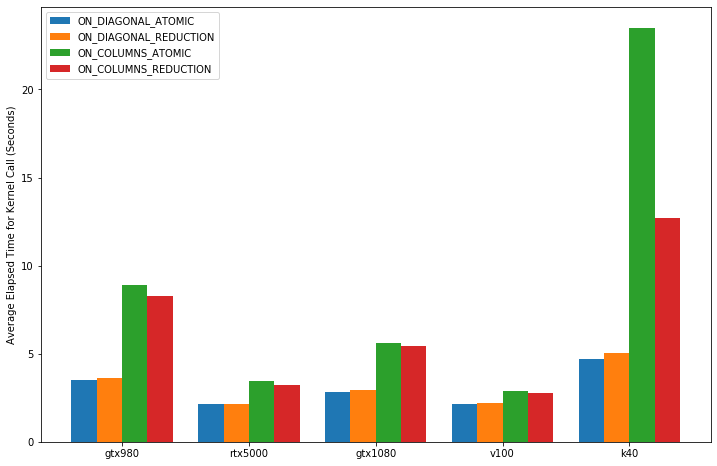

In [17]:
x = np.arange(len(labels_gpu))
w = 0.2
fig, ax = plt.subplots(figsize =(12, 8))

for i in range(len(labels_methods)):
    plt.bar(x + i*w, vals[i], w, label=labels_methods[i])
plt.xticks(x+(len(labels_methods) - 1)/2*w, labels_gpu)
plt.ylabel('Average Elapsed Time for Kernel Call (Seconds)')

plt.legend()


plt.savefig('by_gpu.png', bbox_inches='tight')
plt.show()

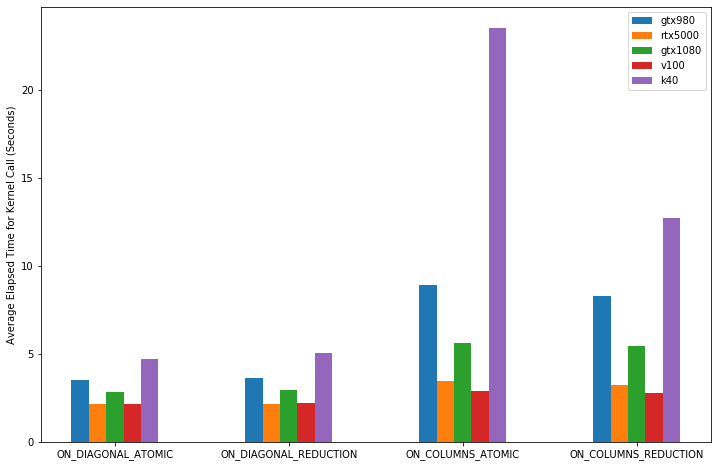

In [18]:
x = np.arange(len(labels_methods))
w = 0.1
fig, ax = plt.subplots(figsize =(12, 8))

for i in range(len(labels_gpu)):
    plt.bar(x + i*w, vals_array[i], w, label=labels_gpu[i])

plt.xticks(x+(len(labels_gpu) - 1)/2*w, labels_methods)
plt.ylabel('Average Elapsed Time for Kernel Call (Seconds)')
# yticks = list(np.arange(0, 5, 1)) + list(np.arange(5, 15, 2)) + list(np.arange(15, 25, 5))
# ax.set_yticks(np.arange(0, 25, 2))
plt.legend()


plt.savefig('by_method.png', bbox_inches='tight')
plt.show()